In [107]:
import pandas as pd

# df = pd.read_csv('CombinedBeansPrice.csv')
df = pd.read_csv('CombinedLeeksPrice.csv')

In [108]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)

Date                0.000000
Item                0.000000
Peliyagoda          4.513889
Kandy               0.462963
Dambulla            1.041667
Meegoda             8.449074
Norochchole        75.115741
Thambuththegama     1.157407
Keppetipola         9.837963
Nuwaraeliya        43.287037
Bandarawela        76.736111
Veyangoda          50.578704
dtype: float64


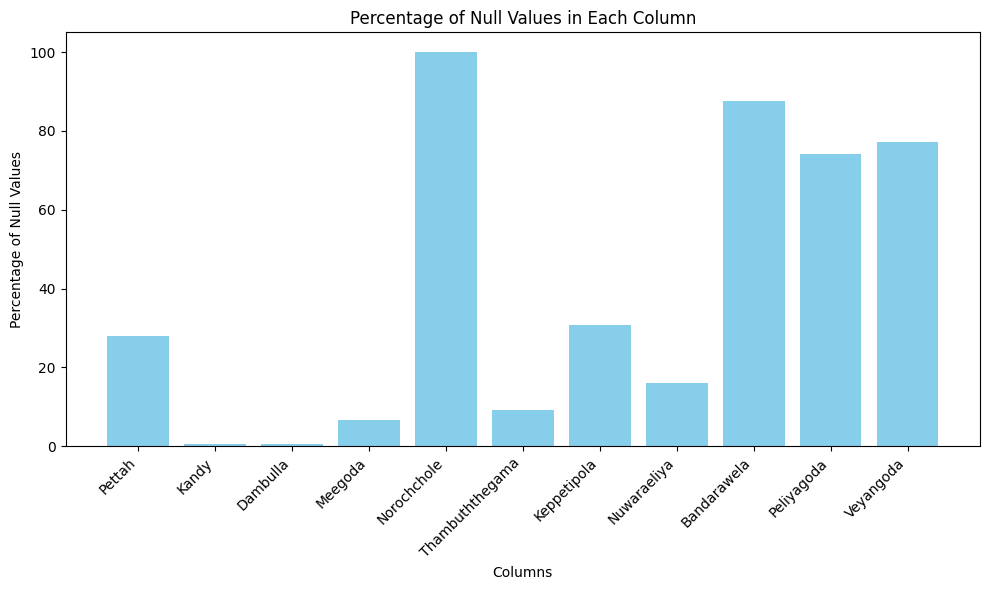

In [109]:
import matplotlib.pyplot as plt

# Data
columns = ['Pettah', 'Kandy', 'Dambulla', 'Meegoda', 'Norochchole', 'Thambuththegama', 'Keppetipola', 'Nuwaraeliya', 'Bandarawela', 'Peliyagoda', 'Veyangoda']
null_percentages = [28.069196, 0.502232, 0.613839, 6.584821, 100.000000, 9.263393, 30.747768, 16.071429, 87.500000, 74.218750, 77.232143]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(columns, null_percentages, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [110]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_dropped = df.dropna(thresh=threshold, axis=1)

# Display the columns that remain after dropping
df_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             864 non-null    object
 1   Item             864 non-null    object
 2   Peliyagoda       825 non-null    object
 3   Kandy            860 non-null    object
 4   Dambulla         855 non-null    object
 5   Meegoda          791 non-null    object
 6   Thambuththegama  854 non-null    object
 7   Keppetipola      779 non-null    object
 8   Nuwaraeliya      490 non-null    object
dtypes: object(9)
memory usage: 60.9+ KB


In [111]:
df_dropped.isnull().sum()

Date                 0
Item                 0
Peliyagoda          39
Kandy                4
Dambulla             9
Meegoda             73
Thambuththegama     10
Keppetipola         85
Nuwaraeliya        374
dtype: int64

In [112]:
import pandas as pd
import numpy as np

# Function to convert price ranges to their average value
def convert_price_range(price_range):
    if pd.isna(price_range):
        return np.nan
    try:
        # Split the price range by hyphens and filter out any empty strings
        prices = [float(price) for price in price_range.split('-') if price]
        # Calculate the average of the two prices
        return sum(prices) / len(prices)
    except:
        return np.nan

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_dropped = df.dropna(thresh=threshold, axis=1)

# Apply the conversion function to the relevant columns
for column in [ 'Peliyagoda','Kandy', 'Dambulla', 'Meegoda', 'Thambuththegama', 'Keppetipola']:
    df_dropped[column] = df_dropped[column].apply(convert_price_range)

# Convert the Date column to datetime
df_dropped['Date'] = pd.to_datetime(df_dropped['Date'])

# Set the Date column as the index
df_dropped.set_index('Date', inplace=True)

# Display the dataframe after conversion
df_dropped.head()



/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_12195/1766342922.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[column] = df_dropped[column].apply(convert_price_range)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_12195/1766342922.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Date'] = pd.to_datetime(df_dropped['Date'])


,Item,Peliyagoda,Kandy,Dambulla,Meegoda,Thambuththegama,Keppetipola,Nuwaraeliya
Date,,,,,,,,
2020-01-01,Tomato,90.0,NaN,110.0,145.0,120.0,NaN,NaN
2020-01-07,Tomato,135.0,145.0,100.0,155.0,125.0,105.0,NaN
2020-01-10,Tomato,110.0,115.0,105.0,NaN,110.0,NaN,NaN
2020-01-12,Tomato,NaN,55.0,45.0,67.5,65.0,50.0,NaN
2020-01-13,Tomato,215.0,295.0,260.0,235.0,240.0,NaN,NaN


In [113]:
df_dropped.isnull().sum()

Item                 0
Peliyagoda          39
Kandy                4
Dambulla             9
Meegoda             73
Thambuththegama     10
Keppetipola         85
Nuwaraeliya        374
dtype: int64

In [114]:
columns_with_forward_fill = ['Kandy', 'Dambulla']

for column in columns_with_forward_fill:
    df_dropped[column].fillna(method='ffill', inplace=True)

/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_12195/1313563479.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped[column].fillna(method='ffill', inplace=True)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_12195/1313563479.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_dropped[column].fillna(method='ffill', inplace=True)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_12195/1313563479

In [115]:
# Remove duplicate index entries by keeping the first occurrence
df_dropped = df_dropped[~df_dropped.index.duplicated(keep='first')]

# Create a date range from the minimum to the maximum date in the index
date_range = pd.date_range(start=df_dropped.index.min(), end=df_dropped.index.max())

# Reindex the DataFrame to include all dates in the range
df = df_dropped.reindex(date_range, fill_value=None)

# Reset the index and rename the index to 'Date'
df = df.reset_index().rename(columns={'index': 'Date'})

In [116]:
df.head()

,Date,Item,Peliyagoda,Kandy,Dambulla,Meegoda,Thambuththegama,Keppetipola,Nuwaraeliya
0,2020-01-01,Tomato,90.0,NaN,110.0,145.0,120.0,NaN,NaN
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df['Kandy'].fillna(method='bfill', inplace=True)

/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_12195/2488569719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Kandy'].fillna(method='bfill', inplace=True)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_12195/2488569719.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Kandy'].fillna(method='bfill', inplace=True)


In [118]:
df.interpolate(inplace=True)

/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_12195/471562723.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True)


In [119]:
df.head()

,Date,Item,Peliyagoda,Kandy,Dambulla,Meegoda,Thambuththegama,Keppetipola,Nuwaraeliya
0,2020-01-01,Tomato,90.0,145.0,110.000000,145.000000,120.000000,NaN,NaN
1,2020-01-02,NaN,97.5,145.0,108.333333,146.666667,120.833333,NaN,NaN
2,2020-01-03,NaN,105.0,145.0,106.666667,148.333333,121.666667,NaN,NaN
3,2020-01-04,NaN,112.5,145.0,105.000000,150.000000,122.500000,NaN,NaN
4,2020-01-05,NaN,120.0,145.0,103.333333,151.666667,123.333333,NaN,NaN


In [120]:
df['Kandy'].fillna(method='bfill', inplace=True)

/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_12195/2488569719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Kandy'].fillna(method='bfill', inplace=True)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_12195/2488569719.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Kandy'].fillna(method='bfill', inplace=True)


In [121]:
df.head()

,Date,Item,Peliyagoda,Kandy,Dambulla,Meegoda,Thambuththegama,Keppetipola,Nuwaraeliya
0,2020-01-01,Tomato,90.0,145.0,110.000000,145.000000,120.000000,NaN,NaN
1,2020-01-02,NaN,97.5,145.0,108.333333,146.666667,120.833333,NaN,NaN
2,2020-01-03,NaN,105.0,145.0,106.666667,148.333333,121.666667,NaN,NaN
3,2020-01-04,NaN,112.5,145.0,105.000000,150.000000,122.500000,NaN,NaN
4,2020-01-05,NaN,120.0,145.0,103.333333,151.666667,123.333333,NaN,NaN


In [122]:
df.isnull().sum()

Date                 0
Item               627
Peliyagoda           0
Kandy                0
Dambulla             0
Meegoda              0
Thambuththegama      0
Keppetipola          6
Nuwaraeliya        998
dtype: int64

In [123]:
import pandas as pd

# Assuming df is your original DataFrame
# Replace df with df_dropped if you're working with a DataFrame named df_dropped

# Select only the desired columns
filtered_df = df[['Date', 'Kandy', 'Dambulla']]

# Export the filtered DataFrame to a CSV file
filtered_df.to_csv('Leaks.csv', index=False)

In [124]:
dollar_df = pd.read_csv("Dollar.csv")

In [125]:
dollar_df['Date'] = pd.to_datetime(dollar_df['Date'])

In [127]:
combined_df = pd.merge(df, dollar_df, on='Date', how='inner')


In [128]:
combined_df.head()

,Date,Item,Peliyagoda,Kandy,Dambulla,Meegoda,Thambuththegama,Keppetipola,Nuwaraeliya,Currency,Buy Rate,Sell Rate
0,2020-01-01,Tomato,90.0,145.0,110.000000,145.000000,120.000000,NaN,NaN,USD,179.4845,183.1540
1,2020-01-02,NaN,97.5,145.0,108.333333,146.666667,120.833333,NaN,NaN,USD,179.2450,182.9138
2,2020-01-03,NaN,105.0,145.0,106.666667,148.333333,121.666667,NaN,NaN,USD,179.3145,183.0840
3,2020-01-06,NaN,127.5,145.0,101.666667,153.333333,124.166667,NaN,NaN,USD,179.3748,183.0439
4,2020-01-07,Tomato,135.0,145.0,100.000000,155.000000,125.000000,105.0,NaN,USD,179.3846,183.0540


In [ ]:
combined_df = combined_df[['Date', 'Kandy', 'Dambulla']]